In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data1=pd.read_csv('covid_19_india.csv')
data2=pd.read_csv('ICMRTestingDetails.csv')


In [16]:
data1.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [15]:
data1.dropna(axis=0,inplace=True)

In [33]:
data2.head()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,13/03/20 18:00,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
1,2,18/03/20 18:00,13125.0,12235.0,150.0,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/03/20 18:00,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf
3,4,20/03/20 18:00,15404.0,14514.0,236.0,ICMR_website_update_20March_6PM_IST.pdf
4,5,21/03/20 18:00,16911.0,16021.0,315.0,ICMR_website_update_21March_6PM_IST.pdf


In [34]:
data2.drop(data2[['Source']],axis=1,inplace=True)

In [44]:
data2.fillna(data2.mean(),inplace=True)

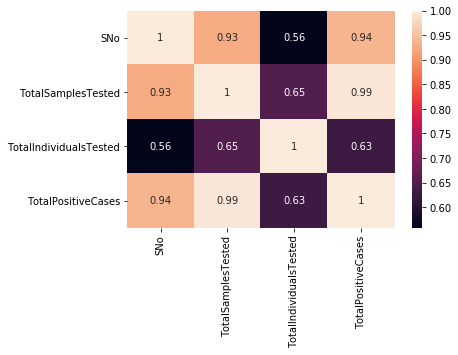

In [45]:
sns.heatmap(data2.corr(),annot=True)
plt.show()

In [46]:
X=data2[['TotalSamplesTested']]
Y=data2['TotalPositiveCases']

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [49]:
lr=LinearRegression()

In [50]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
Y_pred=lr.predict(X_test)
Y_pred

array([1277.24901883, 3056.93134984,  289.47987694, 1463.58657811,
       3962.37925063, 2597.94755507,  816.16431739,  354.09347607])

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
mean_squared_error(Y_test,Y_pred)

80956.02915223627

In [56]:
r2_score(Y_test,Y_pred)

0.9529633492789857

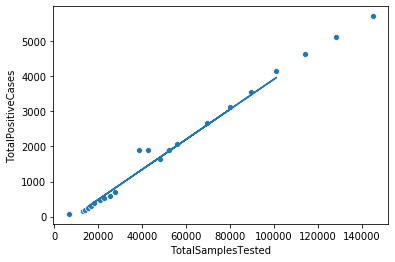

In [60]:
sns.scatterplot(data=data2,x='TotalSamplesTested',y='TotalPositiveCases')
plt.plot(X_test[['TotalSamplesTested']],Y_pred)
plt.show()

In [62]:
data1.dropna(axis=0,inplace=True)

In [68]:
data1['ConfirmedIndianNational'].replace('-',np.nan,inplace=True)

In [69]:
data1['ConfirmedForeignNational'].replace('-',np.nan,inplace=True)

In [70]:
data1

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
796,797.0,09/04/20,5:00 PM,Telengana,NaN,NaN,35.0,7.0,442.0
797,798.0,09/04/20,5:00 PM,Tripura,NaN,NaN,0.0,0.0,1.0
798,799.0,09/04/20,5:00 PM,Uttarakhand,NaN,NaN,5.0,0.0,35.0
799,800.0,09/04/20,5:00 PM,Uttar Pradesh,NaN,NaN,31.0,4.0,410.0
800,801.0,09/04/20,5:00 PM,West Bengal,NaN,NaN,16.0,5.0,103.0


In [79]:
data1.fillna(0,inplace=True)

In [81]:
data1.fillna(data1.mean(),inplace=True)

In [83]:
data1.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
796,797.0,09/04/20,5:00 PM,Telengana,0,0,35.0,7.0,442.0
797,798.0,09/04/20,5:00 PM,Tripura,0,0,0.0,0.0,1.0
798,799.0,09/04/20,5:00 PM,Uttarakhand,0,0,5.0,0.0,35.0
799,800.0,09/04/20,5:00 PM,Uttar Pradesh,0,0,31.0,4.0,410.0
800,801.0,09/04/20,5:00 PM,West Bengal,0,0,16.0,5.0,103.0


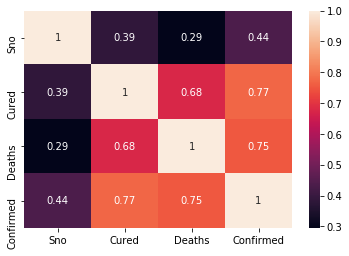

In [85]:
sns.heatmap(data1.corr(),annot=True)
plt.show()

In [86]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       801 non-null    float64
 1   Date                      801 non-null    object 
 2   Time                      801 non-null    object 
 3   State/UnionTerritory      801 non-null    object 
 4   ConfirmedIndianNational   801 non-null    object 
 5   ConfirmedForeignNational  801 non-null    object 
 6   Cured                     801 non-null    float64
 7   Deaths                    801 non-null    float64
 8   Confirmed                 801 non-null    float64
dtypes: float64(4), object(5)
memory usage: 62.6+ KB


In [88]:
data1_cat=data1.select_dtypes(object)

In [90]:
data1_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      801 non-null    object
 1   Time                      801 non-null    object
 2   State/UnionTerritory      801 non-null    object
 3   ConfirmedIndianNational   801 non-null    object
 4   ConfirmedForeignNational  801 non-null    object
dtypes: object(5)
memory usage: 37.5+ KB


In [91]:
from sklearn.preprocessing import LabelEncoder